In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import json
import os
import sys
sys.path.append("../lib")
from dataUtils import *
import cPickle as pickle
import cv2
from collections import Counter
from scipy.interpolate import UnivariateSpline
from scipy.stats import entropy 
from scipy.stats import chisquare
from scipy.stats import ttest_ind


In [31]:
popular_color_features = "../Final_features/vine_features_ordered.csv"
unpopular_color_features = "../Final_features/Unpopular2016_aesthetic_ordered.csv"
aesthetic_color_features = "../Logs/aesthetic_features_6.csv"
#aesthetic_csv = "../Final_features/total_aesthetic_thirds.pk"
aesthetic_csv = "../Final_features/Thirds_aesthetic_thirds.pk"
aesthetic_pop_temporal = "../Final_features/popTemporalSampledAesthetic.csv"
aesthetic_unpop_temporal = "../Final_features/unpopTemporalSampledAesthetic.csv"

In [39]:
def readFeatureFile(color_features):
    with open(color_features) as g:
        featureLines = g.readlines()
    print len(featureLines)
    return featureLines

def readAesFeatuers(lines):
    features = []
    for line in lines:
        components = line.strip().split('|')
        features.append([float(x) for x in components[1:]])
    return features

def readFeatures(lines):
    ids = []
    features = []
    feats = []
    
    components = lines[0].strip().split(',')
    ID = components[0].strip().split('_')[0]
    
    for line in lines:
        components = line.strip().split('|')
        postId = components[0].strip().split('_')[0]
        if postId != ID:
            ids.append(postId)
            ID = postId
            #Take median of all frames in a vine for all the attributes
            #median = np.median(feats,0)
            median = feats[0]
            for i in range(len(median)):
                if np.isnan(median[i]):
                    median[i] = 0.0
            features.append(median)
            feats[:] = []
            feats.append([float(x) for x in components[1:]]) 
        else :
            feats.append([float(x) for x in components[1:]]) 
            
    return features, ids
    

def readFeaturesAsVector(lines):
    ids = []
    features = []
    feats = []
    
    components = lines[0].strip().split(',')
    ID = components[0].strip().split('_')[0]
    
    for line in lines:
        components = line.strip().split('|')
        postId = components[0].strip().split('_')[0]
        if postId != ID:
            ids.append(postId)
            ID = postId
            features.append(feats[:7])
            feats[:] = []
            feats.append([float(x) for x in components[1:]]) 
        else :
            feats.append([float(x) for x in components[1:]]) 
            
    return features, ids

def getMaximumHistogram(featureVec , dimension ,function):
    classifierCoeefs = np.asarray([ 0.       ,   0.03343475,  0.0218128 ,  0.02341605 , 0.02355142,  0.02526042,
  0.02290093,  0.02206709,  0.02891414,  0.02192985,  0.01503583,  0.,
  0.02182189,  0.02630779 , 0.02273517,  0.02183237,  0.02532157,  0.02034298,
  0.01239432])
    
    maxClassifierCoefs = np.asarray([[ 0.       ,   0.03453842,  0.02570736,  0.02543318,  0.02516512,  0.02729427,
  0.02423508,  0.02827428,  0.02917423,  0.02597833,  0.01458388,  0.,
  0.02122234,  0.02544339,  0.02607218,  0.02100649,  0.02610868,  0.02172767,
  0.01354962]])
    max_hist = np.zeros(7)
    for video in featureVec:
        vec = [np.dot(maxClassifierCoefs,video[i][:]) for i in range(len(video))]
        maxArg = function(np.asarray(vec))
        max_hist[maxArg]+=1
    return [np.sum(max_hist[:2])/len(featureVec) , np.sum(max_hist[2:4])/len(featureVec) , np.sum(max_hist[4:6])/len(featureVec) ]
    

In [33]:
poptempLines = readFeatureFile(popular_color_features)



50187


In [34]:
unpoptempLines = readFeatureFile(aesthetic_unpop_temporal)

1210


In [35]:
popFeatureVec , popPosts = readFeaturesAsVector(poptempLines)

In [24]:
unpopFeatureVec , unpopPosts = readFeaturesAsVector(unpoptempLines)

In [25]:
unpopFeatureVec[1][0]

[7.016868567670068e-14,
 0.9342863781728753,
 0.06120288725221036,
 0.0009765625,
 0.001708984375,
 0.007748312894398331,
 0.011927083333333333,
 0.9322843668301549,
 0.12840624209239992,
 0.833461758025358,
 0.0,
 0.0,
 0.045529575241284544,
 -0.2780378903535902,
 0.03949227827249132,
 0.018865434994091226,
 0.6472439236111112,
 0.03784325697367253,
 0.0]

In [28]:
maxPopVec = getMaximumHistogram(popFeatureVec,17 ,np.argmax)

maxunPopVec = getMaximumHistogram(unpopFeatureVec,17 ,np.argmax)

In [51]:
print maxPopVec
print maxunPopVec

[0.31536068730558436, 0.29136424233446895, 0.26810842838098059]
[0.36180904522613067, 0.3165829145728643, 0.32160804020100503]


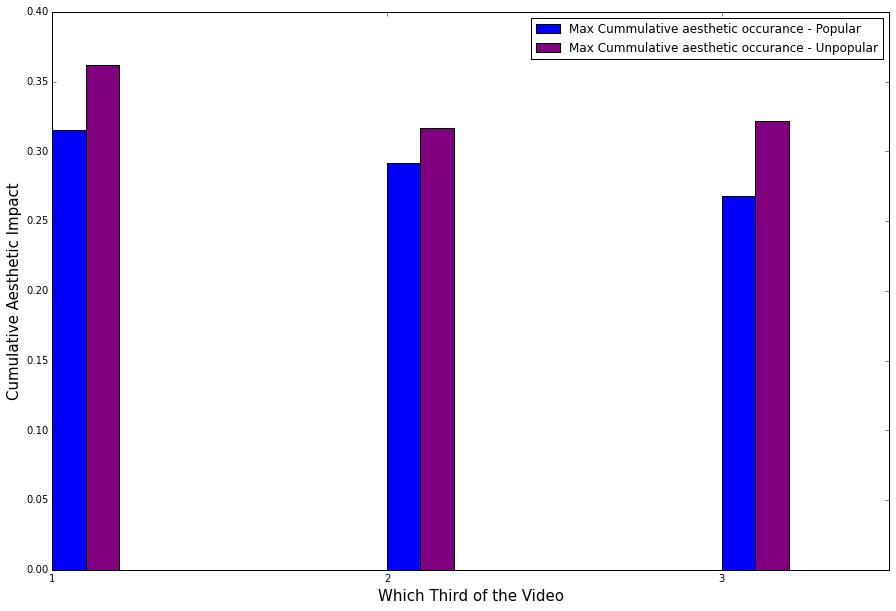

In [30]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)
ind = np.arange(1,4) 
width = 0.1
## the bars
rects1 = ax.bar(ind, maxPopVec, width,
                color='b')
#rects2 = ax.bar(ind+width, minPopVec, width,
#                color='g')
# rects3 = ax.bar(ind+2*width, maxunPopVec, width,
#                 color='r')
rects4 = ax.bar(ind+width, maxunPopVec, width,
                 color='purple')

# add some text for labels, title and axes ticks
ax.set_ylabel('Cumulative Aesthetic Impact',fontsize=15)
ax.set_xlabel('Which Third of the Video',fontsize=15)
plt.legend(['Max Cummulative aesthetic occurance - Popular' , 'Max Cummulative aesthetic occurance - Unpopular' ]
            , loc='upper right')
ax.set_xticks(ind )

plt.show()

In [40]:
pop_features = readFeatureFile(popular_color_features)
unpop_features = readFeatureFile(unpopular_color_features)
aesthetic_features = readFeatureFile(aesthetic_color_features)

50187
21733
1149


In [41]:
popfeatures_matrix , popposts = readFeatures(pop_features)

In [42]:
unpopfeatures_matrix , unpopposts = readFeatures(unpop_features)

In [43]:
aes_feature = readAesFeatuers(aesthetic_features)

In [44]:
print len(popposts) , len(unpopposts)

6751 11723


In [45]:
totalPosts = np.asarray(popposts + unpopposts)
print totalPosts.shape
print totalPosts[1]

(18474,)
1281874693611532288


In [46]:
totalFeats = np.asarray(popfeatures_matrix + unpopfeatures_matrix)
print totalFeats.shape
print totalFeats[15012]

(18474, 19)
[ -1.97269995e-14   4.29733404e+00   4.35666971e-01   2.49023438e-02
   3.80859375e-02   3.13328493e-01   1.90694444e-01   8.86440146e-01
   4.61755756e-02   1.27490974e-01   0.00000000e+00   0.00000000e+00
   1.20529997e-01  -1.28924876e-02   5.53736062e-02   9.59813807e-02
   5.61592882e-01   7.67108616e-02   2.00000000e+00]


In [47]:
totalMap = np.append(totalPosts.reshape((-1,1)),totalFeats , axis=1)
print totalMap[15012]

['1384696746931826688' '-1.97269994996e-14' '4.29733404131'
 '0.435666970725' '0.02490234375' '0.0380859375' '0.313328493495'
 '0.190694444444' '0.886440145673' '0.0461755756228' '0.12749097429' '0.0'
 '0.0' '0.120529996543' '-0.0128924876433' '0.0553736062438'
 '0.0959813807005' '0.561592881944' '0.0767108616108' '2.0']


In [48]:
import pickle
f = open(aesthetic_csv , "w+")
pickle.dump(totalMap, f)
f.close()

In [49]:
f = open(aesthetic_csv , "r+")
feats = pickle.load(f)
f.close()
print feats[104]

['1282183367848497152' '-1.25542623279e-15' '12.0761331195'
 '0.144672389416' '0.001708984375' '0.003173828125' '0.50666930537'
 '0.780613425926' '0.852124605479' '0.0610475900012' '0.18608915614' '0.0'
 '0.0' '0.0056325197426' '-0.453948995118' '0.0118355735306'
 '0.00345532992577' '0.741707175926' '0.00403097359271' '2.0']


In [50]:
unpop_aes_features = np.asarray(unpopfeatures_matrix)
aes_feats = np.asarray(aes_feature)
pop_aes_features = np.asarray(popfeatures_matrix)

print unpop_aes_features.shape , aes_feats.shape , pop_aes_features.shape

(11723, 19) (1149, 19) (6751, 19)


In [ ]:
samples_pop = np.random.choice(pop_aes_features.shape[0],1000)
samples_unpop = np.random.choice(unpop_aes_features.shape[0], 1000)
samples_aes = np.random.choice(aes_feats.shape[0], 1000)
sampledpop_aes_features = pop_aes_features[samples_pop,:]
sampledunpop_aes_features = unpop_aes_features[samples_unpop,:]
sampled_aes = aes_feats[samples_aes,:]

In [ ]:
print sampledpop_aes_features.shape , sampledunpop_aes_features.shape

In [ ]:
num = 7
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)
plt.hist(sampledpop_aes_features[:,num], 1000, normed=0,histtype='step', cumulative=True, linewidth = 1.0)
plt.hist(sampledunpop_aes_features[:,num], 1000, normed=0,histtype='step', cumulative=True, linewidth = 1.0)
plt.hist(sampled_aes[:,num], 1000, normed=0,histtype='step', cumulative=True, linewidth = 1.0)
plt.legend(['Popular Posts', 'Unpopular Posts' , 'Aesthetic sample images'])
plt.title('Rule of Thirds distribution for unpopular and popular videos', fontsize = 25)
plt.show()

print np.mean(sampledpop_aes_features[:,num]) , np.var(sampledpop_aes_features[:,num])
print np.mean(unpop_aes_features[:,num]) , np.var(unpop_aes_features[:,num])
print np.mean(sampled_aes[:,num]) , np.var(sampled_aes[:,num])

In [ ]:
num = 4
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)
plt.hist(sampledpop_aes_features[:,num], 1000, normed=1,histtype='step', cumulative=True, linewidth = 1.0)
plt.hist(unpop_aes_features[:,num], 1000, normed=1,histtype='step', cumulative=True, linewidth = 1.0)
plt.hist(sampled_aes[:,num], 1000, normed=1,histtype='step', cumulative=True, linewidth = 1.0)
plt.legend(['Popular Posts', 'Unpopular Posts' , 'Aesthetic Image dataset'])
plt.title('Modified Luo Simplicity distribution for unpopular and popular videos', fontsize = 25)
plt.show()
print np.mean(sampledpop_aes_features[:,num]) , np.var(sampledpop_aes_features[:,num])
print np.mean(unpop_aes_features[:,num]) , np.var(unpop_aes_features[:,num])
print np.mean(sampled_aes[:,num]) , np.var(sampled_aes[:,num])

In [ ]:
for i in range(sampledunpop_aes_features.shape[1]):
    print "Index %d" %i
    print "Aesthetic images: %0.3f , %0.3f , %0.3f "%( np.mean(aes_feats[:,i]), np.median(aes_feats[:,i]) , np.var(aes_feats[:,i]) )
    print "Popolar Vines: %0.3f , %0.3f , %0.3f "%( np.mean(sampledpop_aes_features[:,i]), np.median(sampledpop_aes_features[:,i]) , np.var(sampledpop_aes_features[:,i]) )
    print "Unpopular Vines: %0.3f , %0.3f , %0.3f "%( np.mean(sampledunpop_aes_features[:,i]), np.median(sampledunpop_aes_features[:,i]) , np.var(sampledunpop_aes_features[:,i]) )
    print "\n"
                                                                                                  

In [ ]:
print entropy(sampledpop_aes_features, sampled_aes, base=None)
print entropy(sampledunpop_aes_features, sampled_aes, base=None)


In [ ]:
num = 16
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)
plt.hist(sampledpop_aes_features[:,num], 1000, normed=1,histtype='step', cumulative=True, linewidth = 1.0 )
plt.hist(unpop_aes_features[:,num], 1000, normed=1,histtype='step', cumulative=True, linewidth = 1.0)
plt.hist(aes_feats[:,num], 1000, normed=1,histtype='step', cumulative=True, linewidth = 1.0)
plt.legend(['Popular Posts', 'Unpopular Posts' ,'Aesthetic Image dataset'])
plt.title('Sharp pixel proportion distribution for popular , unpopular videos Vs Top aesthetic images', fontsize = 25)
plt.grid()
plt.show()
print np.mean(sampledpop_aes_features[:,num]) , np.var(sampledpop_aes_features[:,num])
print np.mean(unpop_aes_features[:,num]) , np.var(unpop_aes_features[:,num])
print np.mean(sampled_aes[:,num]) , np.var(sampled_aes[:,num])

In [ ]:
print np.mean(sampledpop_aes_features[:,16]) , np.median(sampledpop_aes_features[:,16])
print np.mean(unpop_aes_features[:,16]) , np.median(unpop_aes_features[:,16])
print np.mean(aes_feats[:,16]) , np.median(aes_feats[:,16])

In [ ]:
fig, ax = plt.subplots()
num = 4
fig.set_size_inches(15, 10)
plt.hist(sampledpop_aes_features[:,num], 500, normed=0,histtype='step', cumulative=True, linewidth = 1.0)
plt.hist(sampledunpop_aes_features[:,num], 500, normed=0,histtype='step', cumulative=True, linewidth = 1.0)
plt.hist(aes_feats[:,num], 500, normed=0,histtype='step', cumulative=True, linewidth = 1.0)
plt.legend(['Popular Posts', 'Unpopular Posts' , 'Aesthetic sample images'])
plt.title('Rule of Thirds distribution for unpopular and popular videos', fontsize = 25)
plt.show()

In [ ]:
fig, ax = plt.subplots()
num = 3
fig.set_size_inches(15, 10)
plt.hist(sampledpop_aes_features[:,num], 100, normed=0,histtype='step', cumulative=False, linewidth = 1.0)
plt.hist(sampledunpop_aes_features[:,num], 100, normed=0,histtype='step', cumulative=False, linewidth = 1.0)
plt.hist(aes_feats[:,num], 100, normed=0,histtype='step', cumulative=False, linewidth = 1.0)
plt.legend(['Popular Posts', 'Unpopular Posts' , 'Aesthetic sample images'])
plt.title('Luo Simplicity distribution for different samples', fontsize = 25)
plt.show()

print np.mean(sampledpop_aes_features[:,num]) , np.median(sampledpop_aes_features[:,num])
print np.mean(unpop_aes_features[:,num]) , np.median(unpop_aes_features[:,num])
print np.mean(aes_feats[:,num]) , np.median(aes_feats[:,num])
t, p = ttest_ind( sampledpop_aes_features[:,num], sampled_aes[:,num])
print p
t, p = ttest_ind( sampledunpop_aes_features[:,num], sampled_aes[:,num])
print p


In [ ]:
fig, ax = plt.subplots()
num = 16
fig.set_size_inches(15, 10)
plt.hist(sampledpop_aes_features[:,num], 1000, normed=0,histtype='step', cumulative=True, linewidth = 1.0)
plt.hist(sampledunpop_aes_features[:,num], 1000, normed=0,histtype='step', cumulative=True, linewidth = 1.0)
plt.hist(aes_feats[:,num], 1000, normed=0,histtype='step', cumulative=True, linewidth = 1.0)
plt.legend(['Popular Posts', 'Unpopular Posts' , 'Aesthetic sample images'])
plt.title('Luo Simplicity distribution for different samples', fontsize = 25)
plt.show()

print np.mean(sampledpop_aes_features[:,num]) , np.median(sampledpop_aes_features[:,num])
print np.mean(unpop_aes_features[:,num]) , np.median(unpop_aes_features[:,num])
print np.mean(aes_feats[:,num]) , np.median(aes_feats[:,num])